# IMAGE CLASSIFICATION PROJECT

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
import tensorflow

In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

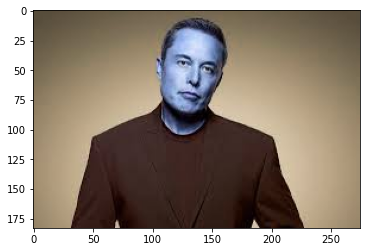

In [55]:
img1=cv2.imread("D:\download.jpg")
plt.imshow(img1)

In [56]:
gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray.shape

(183, 275)

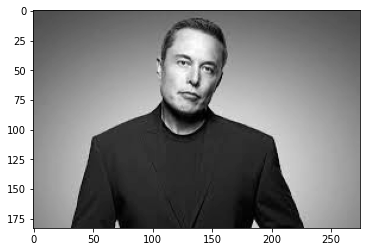

In [9]:
plt.imshow(gray,cmap='gray')

In [10]:
def process(path):
    img=cv2.imread(path)
    #plt.imshow(img,cmap='gray')
    print(img)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face=face_cascade.detectMultiScale(gray,1.5,5)
    for (x,y,w,h) in face:
        cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),5)
        return img[y:y+h,x:x+w]

[[[102 109 118]
  [ 97 104 113]
  [ 43  52  62]
  ...
  [ 48  51  65]
  [ 42  45  60]
  [ 40  43  58]]

 [[160 167 176]
  [134 141 150]
  [ 41  50  60]
  ...
  [ 62  65  79]
  [ 49  52  67]
  [ 27  30  45]]

 [[184 190 201]
  [155 161 172]
  [  3  12  22]
  ...
  [ 64  66  77]
  [ 43  44  58]
  [ 28  31  45]]

 ...

 [[226 226 226]
  [226 226 226]
  [226 226 226]
  ...
  [250 249 255]
  [231 225 226]
  [ 24  13   9]]

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [252 252 255]
  [241 233 234]
  [ 39  28  24]]

 [[228 227 229]
  [228 227 229]
  [228 228 228]
  ...
  [255 254 255]
  [239 231 231]
  [ 51  41  34]]]


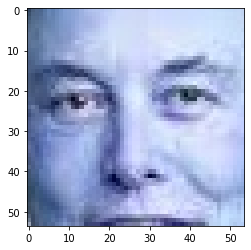

In [53]:
path="C:\DATASETS\cropped\elonmusk\elonmusk_134.jpg"
img=plt.imshow(process(path))

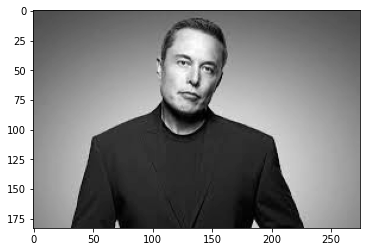

In [36]:
plt.imshow(gray,cmap="gray")

In [37]:
face=face_cascade.detectMultiScale(gray,1.5,5)

In [51]:
x,y,w,h=face[0]
print(x,y,w,h)

108 25 54 54


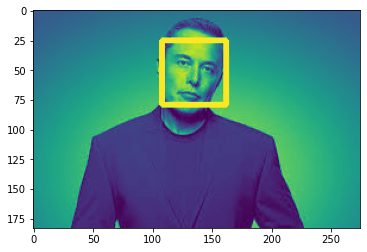

In [60]:
faceimage=cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(faceimage)

In [61]:
for (x,y,w,h) in face:
            eyes = eye_cascade.detectMultiScale(gray)

In [76]:
print(eyes[0])

[116  33  21  21]


In [77]:
len(eyes)

1

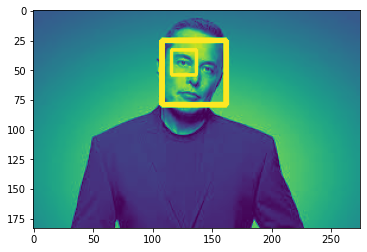

In [78]:

eye_image=cv2.rectangle(gray,(x1,y1),(x1+w1,y1+h1),(255,0,0),2)
plt.imshow(eye_image)

In [79]:
dirpath="C:/DATASETS/cropped/"
def directory_check(c):
     if not os.path.exists(dirpath+c):
        os.mkdir(dirpath+c)
     return True

In [80]:
wastepath="C:/DATASETS/wasted/"
def wasted_check(c):
    if not os.path.exists(wastepath+c):
        os.mkdir(wastepath+c)
    return True

In [81]:
count={}
def convert(img,file):
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        face=face_cascade.detectMultiScale(gray,1.5,3)
        c=file.split("\\")[1]
        for (x,y,w,h) in face:
            eyes = eye_cascade.detectMultiScale(gray[y:y+h,x:x+w])
            if c in count:
                count[c]+=1
            else:
                count[c]=1
            if len(eyes)>=2:
                if directory_check(c):
                     cv2.imwrite(f"C:/DATASETS/cropped/{c}/{c}_{count[c]}.jpg",img[y:y+h,x:x+w])
                     return True
            else:
                if wasted_check(c):
                     cv2.imwrite(f"C:/DATASETS/wasted/{c}/{c}_{count[c]}.jpg",img[y:y+h,x:x+w])


In [82]:
data=0
for file in glob.glob("C:/DATASETS/images/*/*.JPG"):
        c=file.split("\\")[1]
        img=cv2.imread(file)
        try:
            con=convert(img,file)
            if con:
                data+=1
        except Exception:
            pass


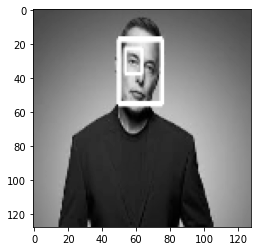

In [83]:
plt.imshow(cv2.resize(gray,[128,128]),cmap="gray")

In [84]:
dataset=tensorflow.keras.preprocessing.image_dataset_from_directory(
"C:/DATASETS/cropped",
    shuffle=True,
    image_size=(256,256),
    batch_size=20
)

Found 260 files belonging to 6 classes.


In [85]:
print(dataset)

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>


In [86]:
len(dataset)

13

In [87]:
classnames=dataset.class_names
print(classnames)

['MESSI', 'abdul kalam', 'elonmusk', 'rohitsharma', 'shashi', 'virat']


In [88]:
for  image_batch,label_batch in dataset.take(2):
    print(image_batch)

tf.Tensor(
[[[[1.16494141e+02 1.08494141e+02 1.06494141e+02]
   [1.19267899e+02 1.11578445e+02 1.08474930e+02]
   [1.17147659e+02 1.12147659e+02 1.08147659e+02]
   ...
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]]

  [[1.13084305e+02 1.08084305e+02 1.05084305e+02]
   [1.10806694e+02 1.05806694e+02 1.02713898e+02]
   [1.18557007e+02 1.13557007e+02 1.09660522e+02]
   ...
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]]

  [[1.17044144e+02 1.11538284e+02 1.10055862e+02]
   [1.16103516e+02 1.11103516e+02 1.08103516e+02]
   [1.18738312e+02 1.13738312e+02 1.10738312e+02]
   ...
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]
   [2.55000000e+02 2.55000000e+02 2.55000000e+02]]

  ...

  [[1.48645309e+02 1.29645309e+02 1.15645309e+02]
   [1

In [102]:
traindata=0.709*7
testdata=0.2
print(traindata)

4.963


In [103]:
train_dataset=dataset.take(5)

In [104]:
test_dataset=dataset.skip(5)

In [105]:
print(len(train_dataset))

5


In [106]:
resizeandrescale=tensorflow.keras.Sequential([
    tensorflow.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [107]:
from tensorflow.keras import layers,models

In [108]:
from tensorflow.keras.models import Sequential

In [140]:
model=models.Sequential([
    resizeandrescale,
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(6,activation='softmax'),
    
])
model.compile(
optimizer='adam',
loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model.fit(train_dataset,epochs=10)

Epoch 1/10
5/5 [==============================] - 4s 614ms/step - loss: 1.6864 - accuracy: 0.3000
Epoch 2/10
5/5 [==============================] - 3s 604ms/step - loss: 1.6178 - accuracy: 0.3600
Epoch 3/10
5/5 [==============================] - 3s 620ms/step - loss: 1.4728 - accuracy: 0.3800
Epoch 4/10
5/5 [==============================] - 3s 601ms/step - loss: 1.2867 - accuracy: 0.5700
Epoch 5/10
5/5 [==============================] - 3s 649ms/step - loss: 1.1807 - accuracy: 0.6000
Epoch 6/10
5/5 [==============================] - 3s 612ms/step - loss: 0.8388 - accuracy: 0.7400
Epoch 7/10
5/5 [==============================] - 3s 611ms/step - loss: 0.6830 - accuracy: 0.8400
Epoch 8/10
5/5 [==============================] - 3s 632ms/step - loss: 0.4697 - accuracy: 0.8500
Epoch 9/10
5/5 [==============================] - 3s 610ms/step - loss: 0.3879 - accuracy: 0.8900
Epoch 10/10
5/5 [==============================] - 3s 623ms/step - loss: 0.1897 - accuracy: 0.9600


In [148]:
def process(path):
    #print(path)
    img=cv2.imread(path)
    plt.imshow(img,cmap='gray')
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face=face_cascade.detectMultiScale(gray,1.5,5)
    for (x,y,w,h) in face:
        cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),5)
        return img[y:y+h,x:x+w]

D:\mesi.jpg
D:\mesi.jpg
[[[ 74 108 121]
  [ 79 110 125]
  [ 60  86 102]
  ...
  [ 46  53  56]
  [ 47  52  55]
  [ 40  45  48]]

 [[ 70  96 108]
  [ 74  98 110]
  [ 40  62  74]
  ...
  [ 26  30  35]
  [ 27  30  35]
  [  8   9  13]]

 [[ 50  72  84]
  [ 36  56  67]
  [  1  19  30]
  ...
  [  8  12  17]
  [  7  10  15]
  [ 14  15  19]]

 ...

 [[ 19  18  20]
  [ 19  18  20]
  [ 19  18  20]
  ...
  [206 203 253]
  [186 177 244]
  [ 89  75 163]]

 [[ 19  18  20]
  [ 19  18  20]
  [ 19  18  20]
  ...
  [206 203 252]
  [190 182 247]
  [ 94  78 165]]

 [[ 19  18  20]
  [ 19  18  20]
  [ 19  18  20]
  ...
  [204 206 247]
  [192 186 243]
  [ 90  77 153]]]


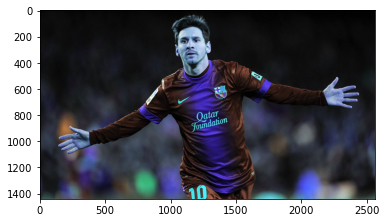

In [142]:
print(process(input()))

D:\candidate image.jpg
D:\candidate image.jpg
[[1.0369651e-03 3.3034034e-05 8.5399877e-03 6.5856270e-04 6.4600331e-01
  3.4372813e-01]]


'shashi'

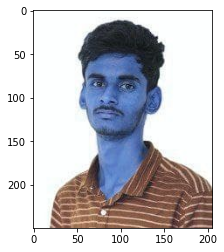

In [144]:
p=input()
res=model.predict(np.array([cv2.resize(process(p),[256,256])]))
print(res)
classnames[np.argmax(res[0])]

d:kalam.jpeg
virat
['MESSI', 'abdul kalam', 'elonmusk', 'rohitsharma', 'shashi', 'virat']


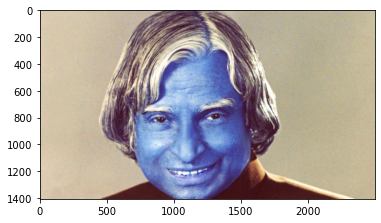

In [158]:
p=input()
res=model.predict(np.array([cv2.resize(process(p),[256,256])]))
print(classnames[np.argmax(res[0])])
print(classnames)

In [156]:
print(classnames)

['MESSI', 'abdul kalam', 'elonmusk', 'rohitsharma', 'shashi', 'virat']


In [159]:
#confusion matix
#headings